<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/MLToyModel_arith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the notebook for the videos
- [Neural nets explained without Calculus - Part 1](https://youtube.com/shorts/7Fbah_9Xni0?feature=share)
- [Neural nets explained without Calculus - Part 2](https://youtube.com/shorts/jbaXWmERhNs?feature=share)


This notebook shows how any neural net model learns, without expecting knowledge of calculus.

We will examine a toy model that learns the value of just **one number** (parameter) from training data. This number is then used to make predictions for input, the model has never seen during training.

The input to the model is the number of rooms in a house and the model output is the price of the house.

The toy model function transforms input (rooms) to the output (price), using this one number **m**:-
 - it simply scales the input by multiplying it by **m** to produce the output.
 - the objective of the training is to learn this scaling value **m**, so that the model predictions are as close as possible to the true values.
   

```
 price = m * rooms
```


We first create a fictitious training dataset of say 10 homes with the number of rooms and prices for each home.

We start off with a random value of **m**, in the model function above.

We feed in all the rooms as input and the model outputs its price predictions


We then compare the predicted price with actual price and see how far off the model is. We find this by subtracting the predicted price from the actual price of a home and square that value to avoid negative values. This is our model error or loss function


**Loss function L**

              = 1/n Σ (actual - predicted) * (actual - predicted), where n is the number of training points

              = 1/n [ (y1 - m * x1) * (y1 - m * x1)   + (y2 - m * x2) * (y2 - m * x2) +.... (y10 - m * x10) * (y10 - m * x10) ]
            
Note, in the error or loss function (we will use error and loss interchangeably)  above, the x and y values  are all constant - they are training data values. The only *changeable quantity is* **m**.

Also note the model error calculated above is a **single number** and is the **average error of the model across all training data points**, for a **particular value of m**.


We want to tweak the value of **m** so that the model error is minimized. To do this, see the curve below where **m** is plotted on the x axis and the loss/error on the y axis.
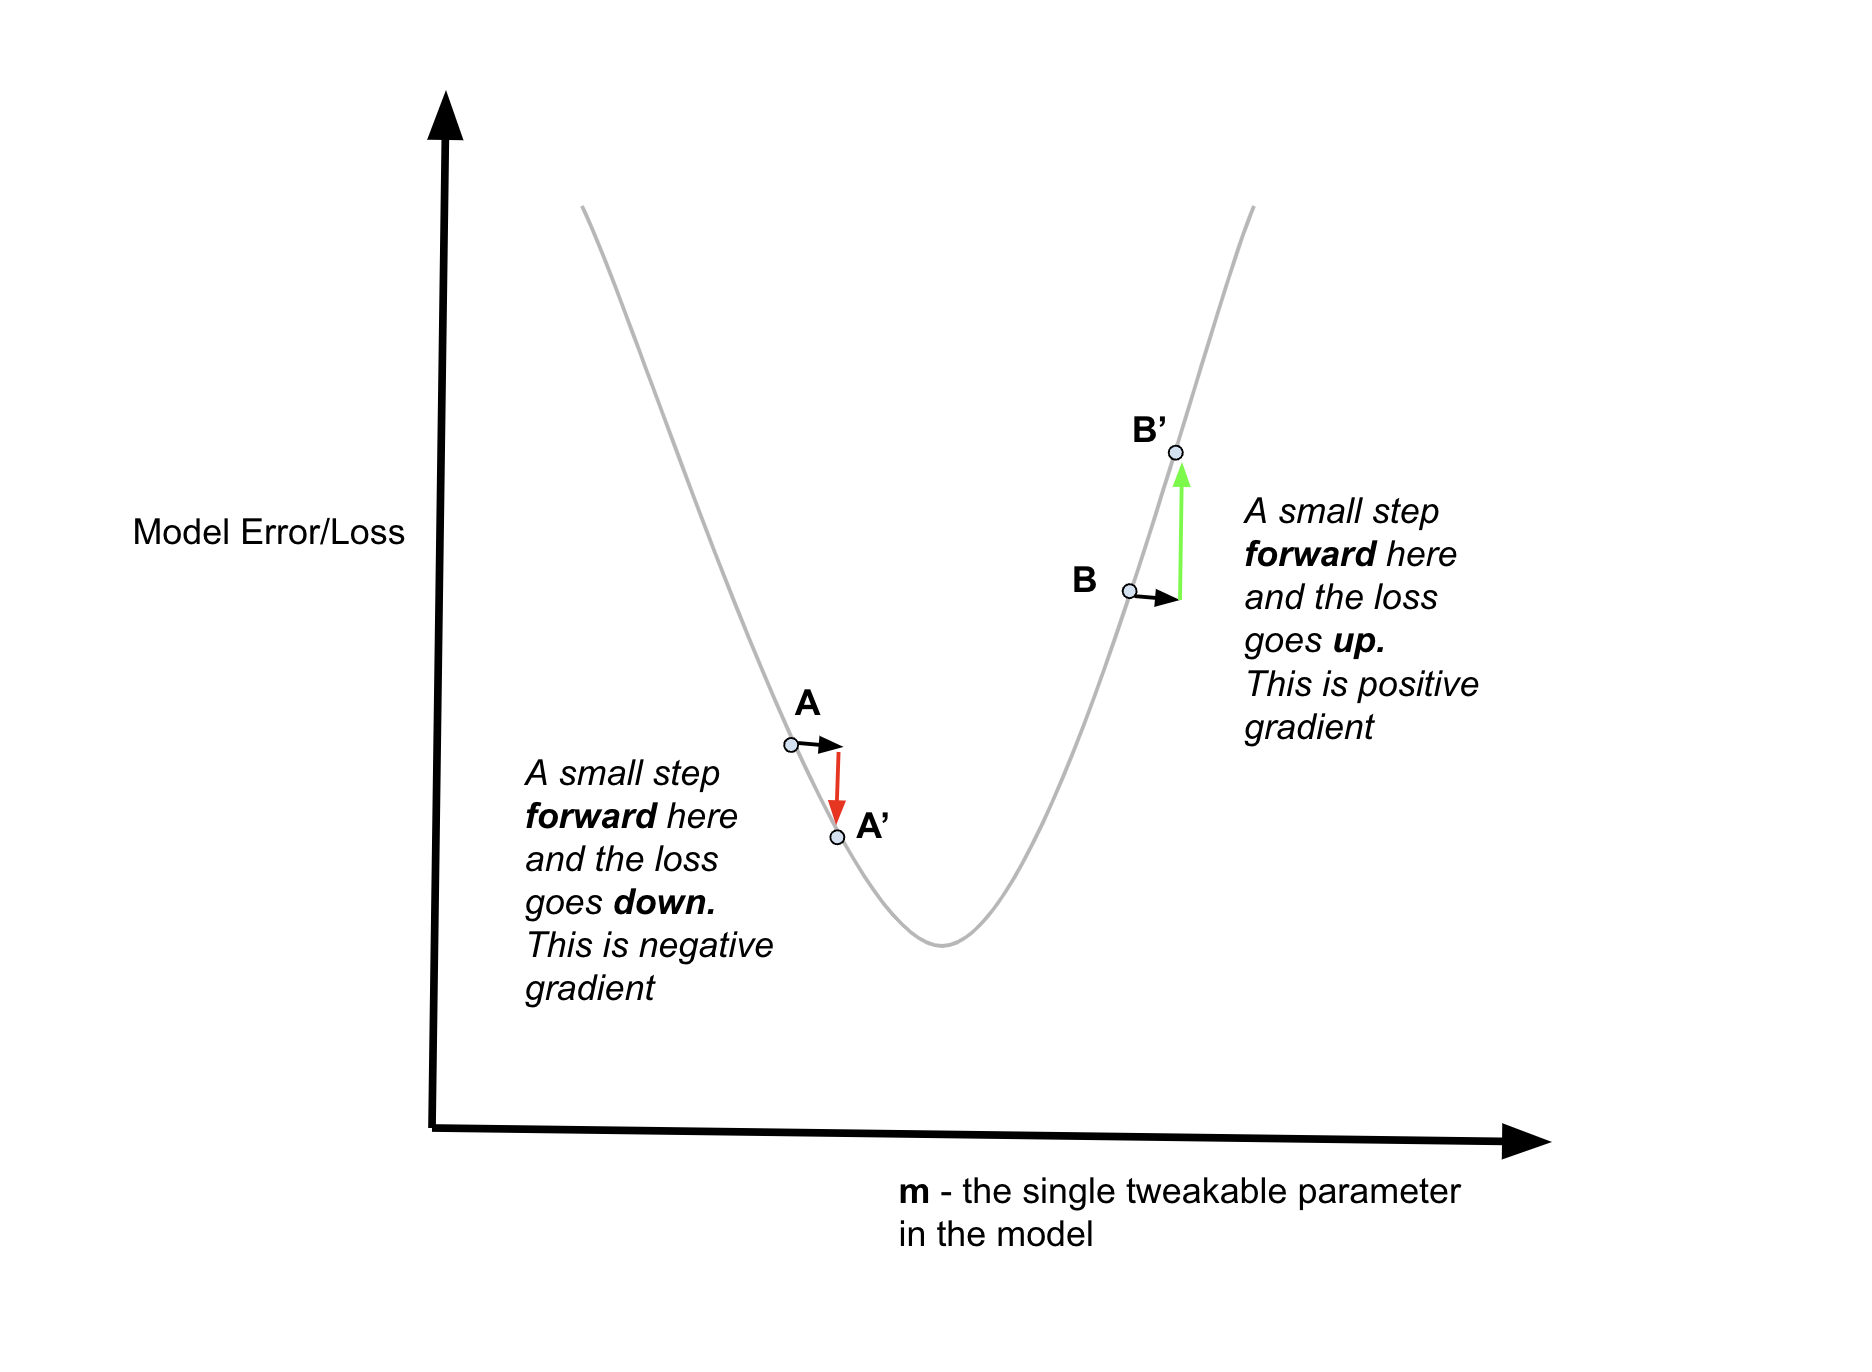



If we are at point **A** in the figure above and add a small amount to **m**, the loss goes down and we end up at **A'**. The slope or gradient of the line connecting **A** and **A'** is   (y2-y1)/(x2-x1), where **A** is x1,y1 and **A'** is x2,y2. This gradient is negative (the function value went down)

If we are at point **B** and add a small amount to **m**, the loss goes up and we end up at **B'**. This gradient of the line connecting **B** and **B'** is positive (the function value went up).

So gradient gives us two pieces of information.  
-  **Direction of the function response**. That is does the function go up or down for a small step **forward** in x direction in figure above
-  **Magnitude  of the function response**. For example, the function response at **A** is less than the response at **B** in the figure above, for the same size forward step along the x axis

We can use the gradient to move up or down the loss function. To move up the loss function from a point, just add the gradient (or a small fraction of it) to the value of **m** at that point. To move down the loss function just subtract the gradient (or a small fraction of it). This observation is true regardless of the shape of the loss function and the initial value of **m**. That is we can start with any random value of **m** and still walk downhill to the minimum loss value.

We will use this observation to minimize the error in our model. We will simply subtract a small portion of the gradient at **m** from the current value of **m**. We keep doing this iteratively to reduce the loss.

So the training steps captured in code below is

1. Start off with a random value of **m**, the learnable parameter. Lets say it is the x coordinate value of point **A** in the figure above
2. Compute the model output for all the training data for this value of **m**
3. Compute the average error in model prediction across all training points. This requires the training data labels - in our case home prices. This error is the model loss for this value of **m** - the y coordinate of point **A**
4. Increment **m** by adding a small value **h**
5. Compute the model output again using all the training data for this new value of m.
6. Compute the average error in model prediction across all training points. This is new point **A'** (m+h,error value)
7. Find the gradient or slope at **A**
8. Subtract the gradient (or a fraction of it) value from **m**. We have taken a step down the loss function. Essentially we are reducing the model error by subtracting the gradient
9. Repeat steps 2 through 9 to keep improving model prediction

Once the model is trained, and the value of **m** that best fits training data, is learned, we can use the model to predict home prices for room counts it has not seen during training.

**Note:**
- As mentioned earler, the learning approach above applies no matter what initial value of **m** we start with
- Any neural net model training adopts the same learning approach in principle. That is, even a billion parameter model (billion learnable **m**s) adopts the same approach. However, the difference is,instead of doing two passes through the model to compute **A** and **A'**, one forward pass is done to just compute **A**, and the gradients are computed efficiently using  **backprogation algorithm**. Also the actual update of the model parameters are done using an algorithm called **gradient descent** that decides how large a step (what fraction of the gradient to use) to take down the hill based on how steep the slope is etc. See additional notes at the end for more details
- In summary, neural net training, finds an optimal setting of all the model parameters or **m**s, so that the function in which they are embedded in, transforms the training input to produce an output that is as close as possible to the corresponding training output. This notebook shows how to find such an optimal setting of parameters, without calculus. Calculus just helps to find an optimal setting more efficiently, particularly, how to find the gradients efficiently.




### First lets create a synthetic dataset for training our toy model


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data
np.random.seed(0)
count = 10
rooms = np.random.randint(1, 10, size=count)
prices = 100 + 50 * rooms + np.random.normal(0, 20, count)
prices = prices.astype(int)
print(rooms)
print(prices)

[6 1 4 4 8 4 6 3 5 8]
[425 139 350 321 509 311 396 278 342 505]


### 1. Now lets train the model

Intital slope chosen at random:0.417022004702574


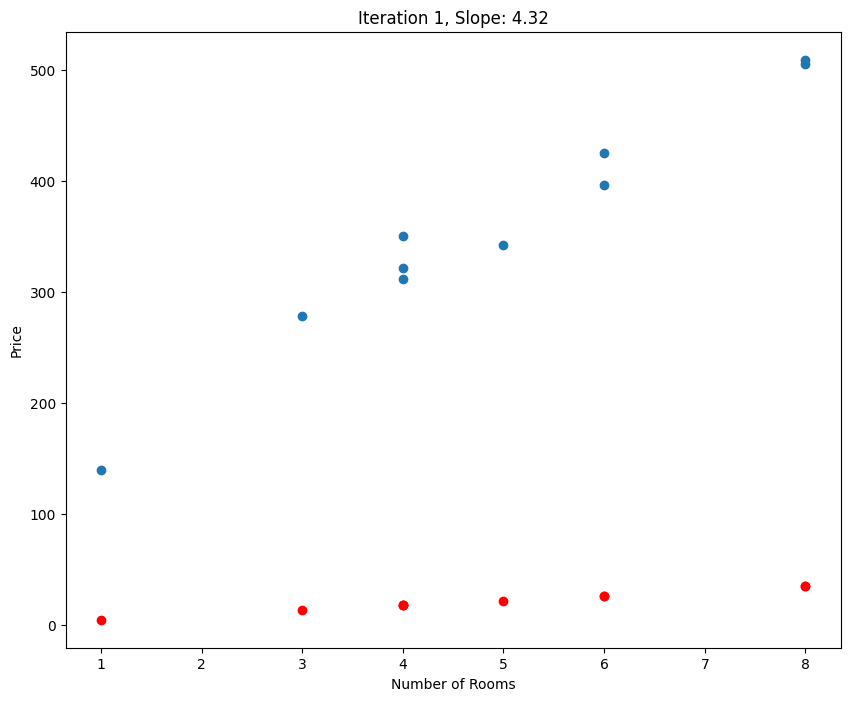

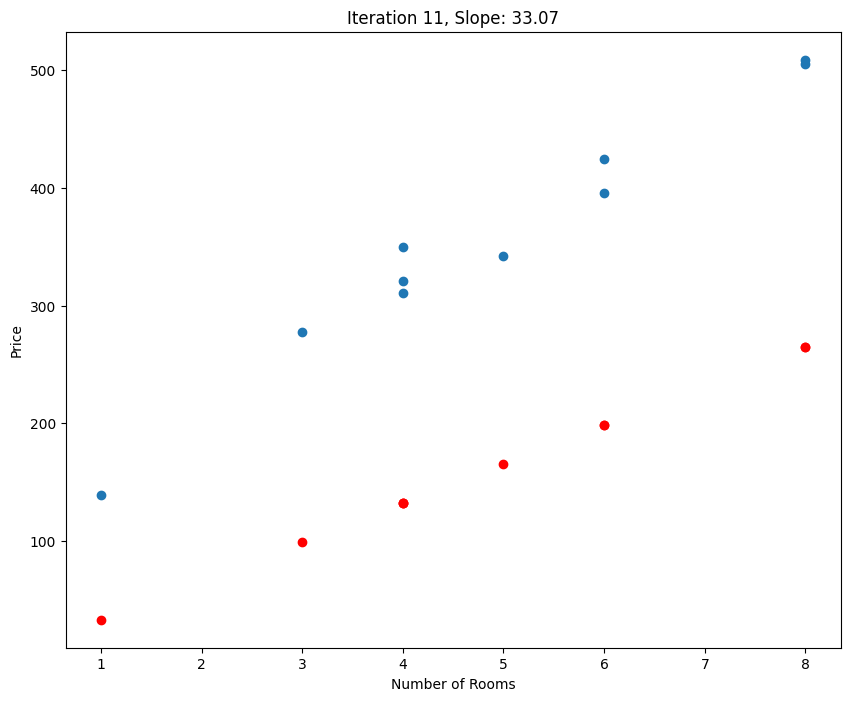

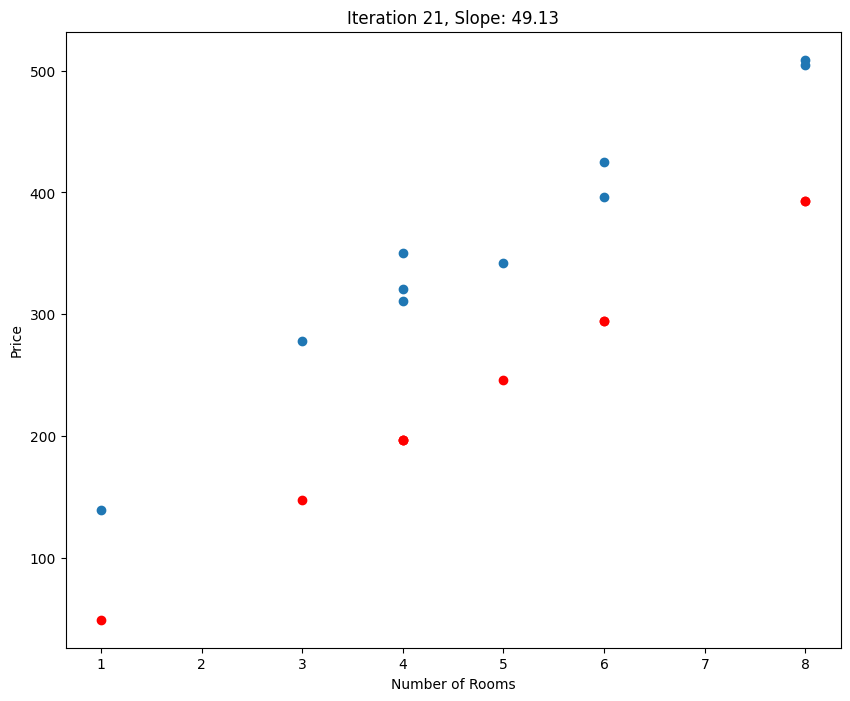

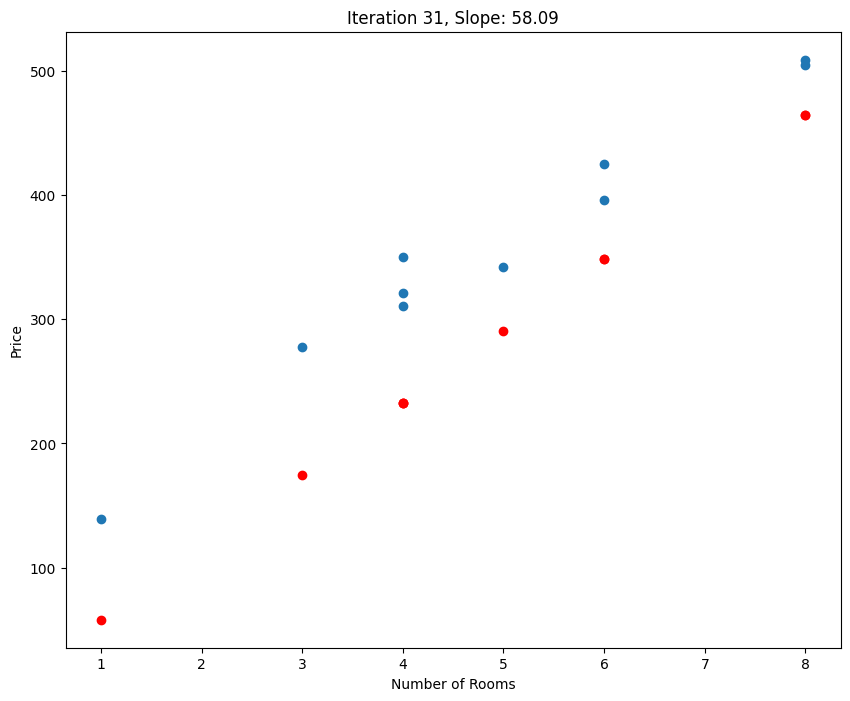

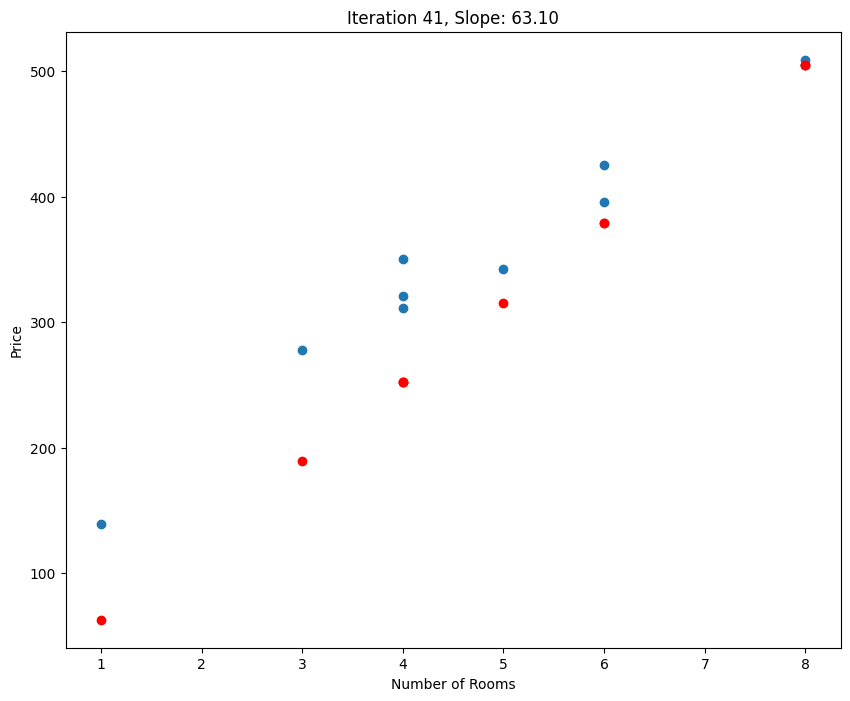

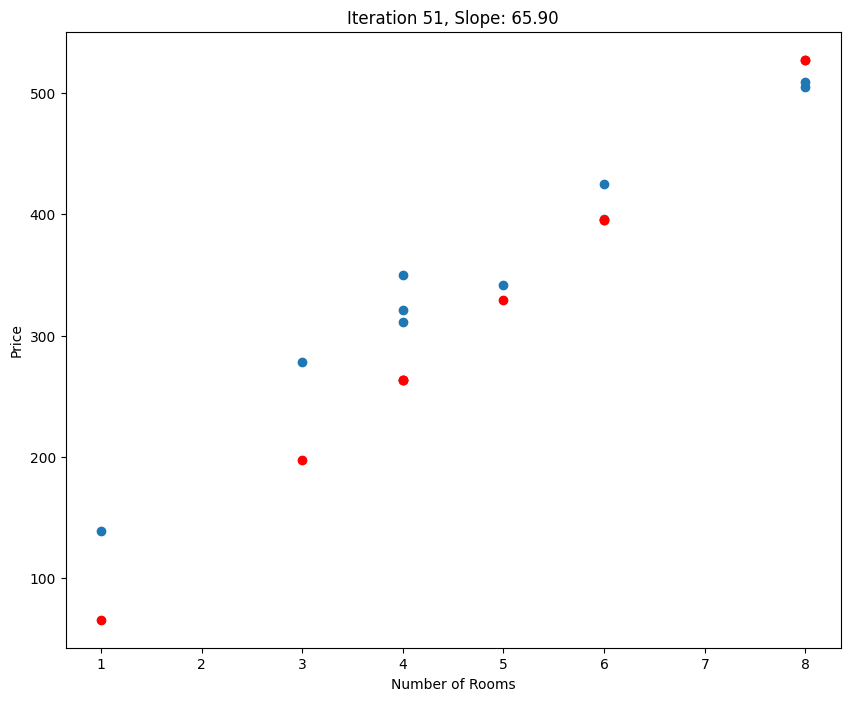

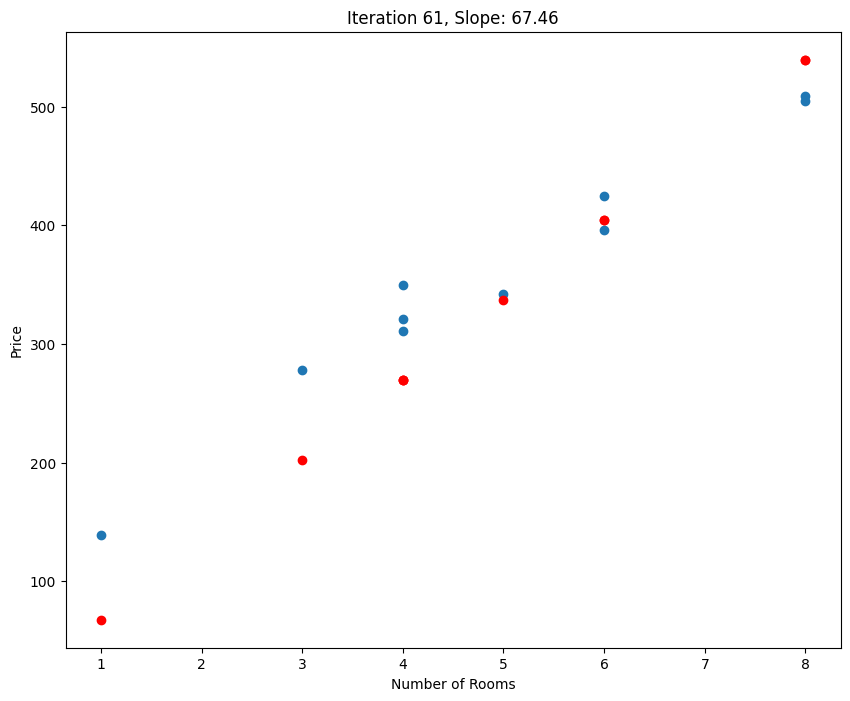

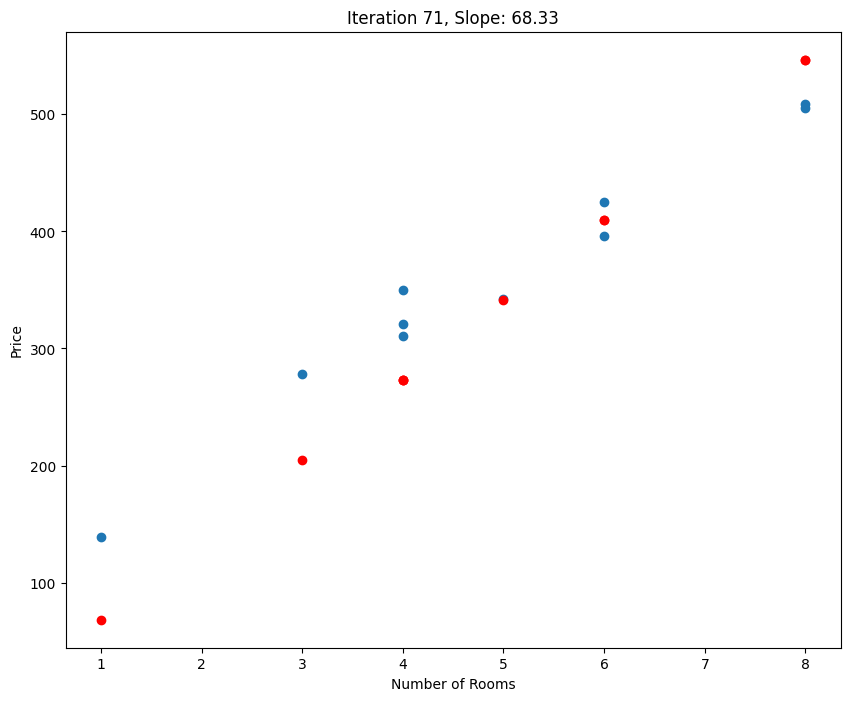

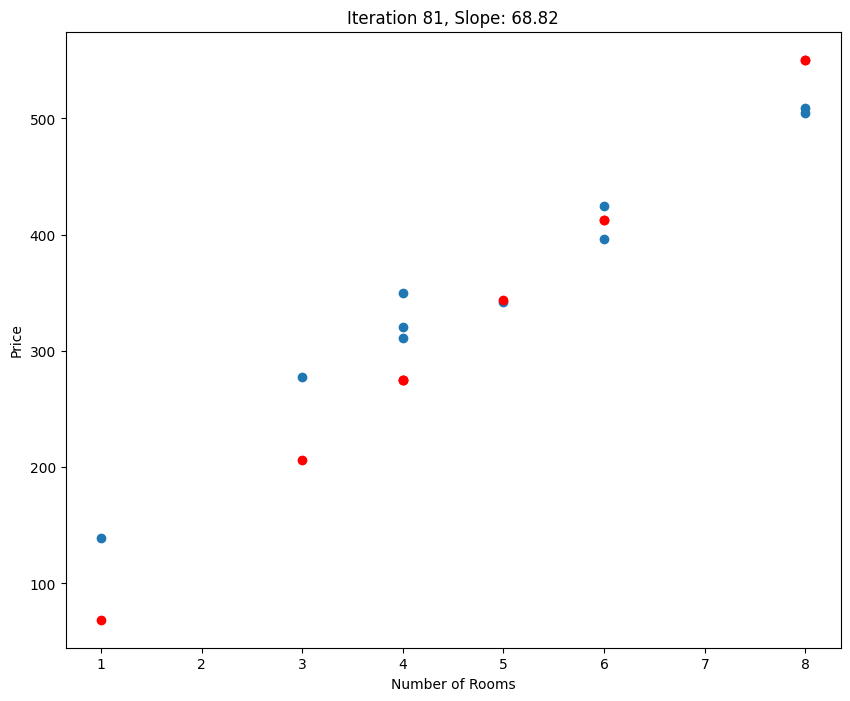

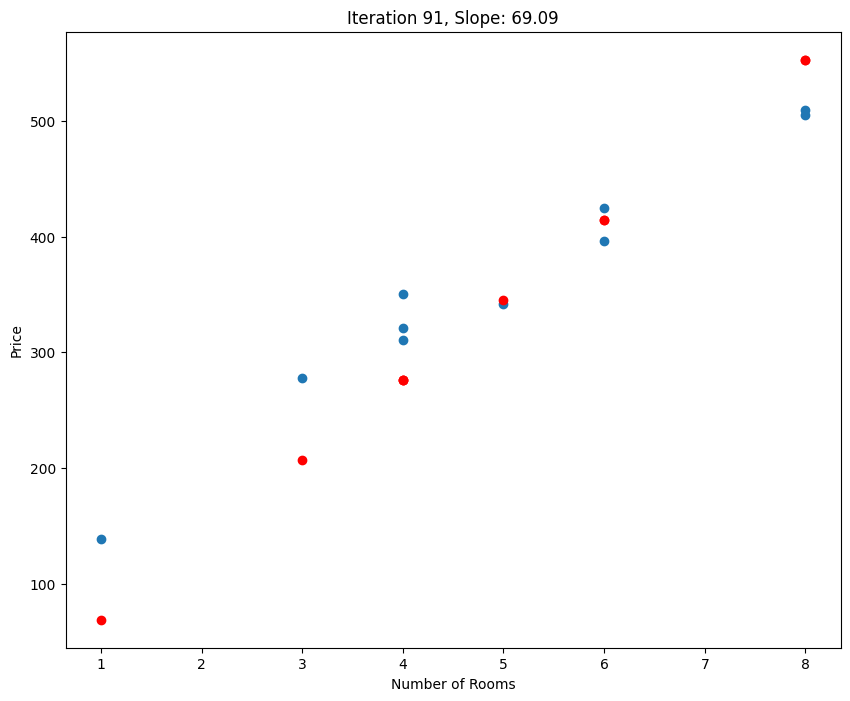

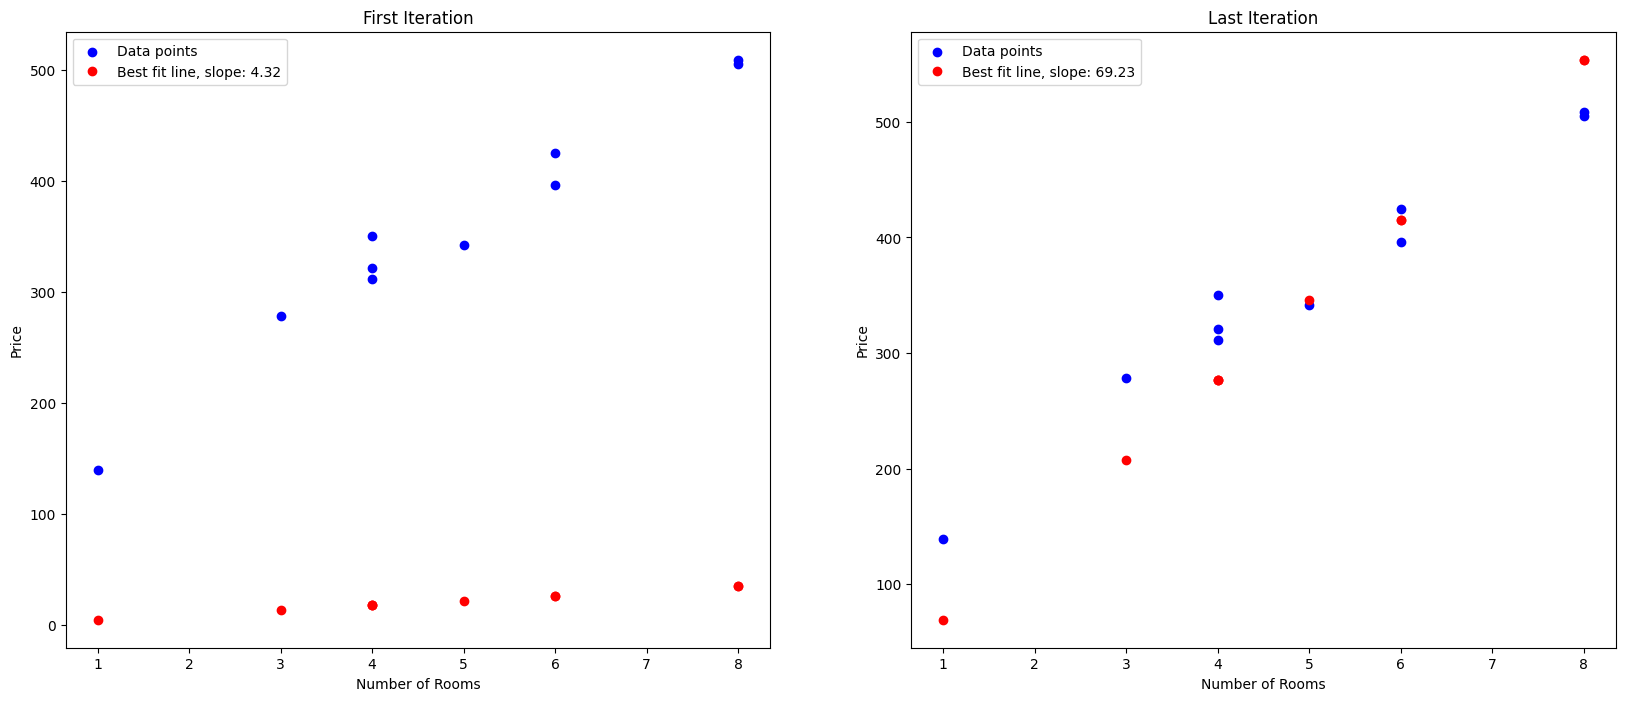

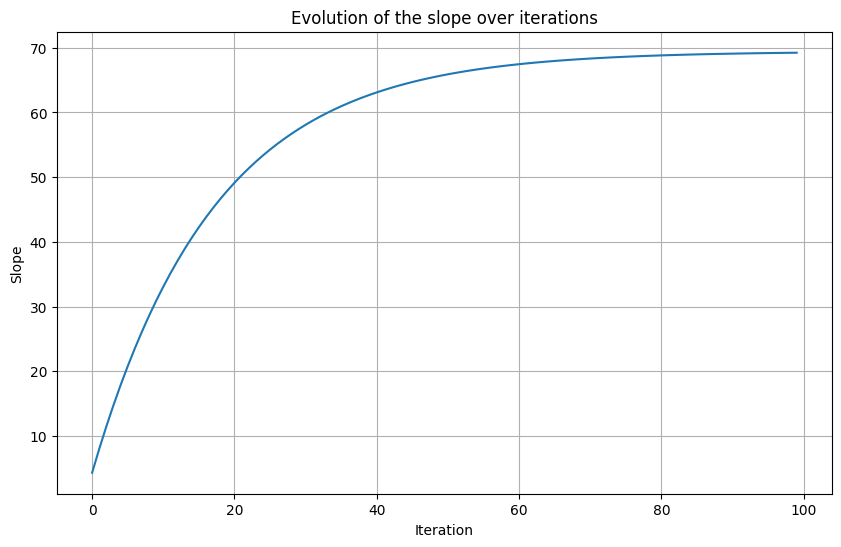

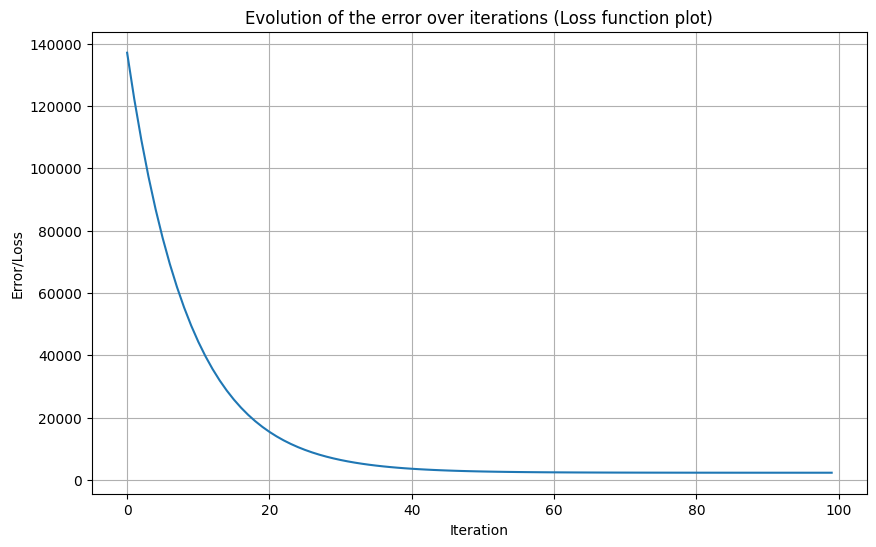

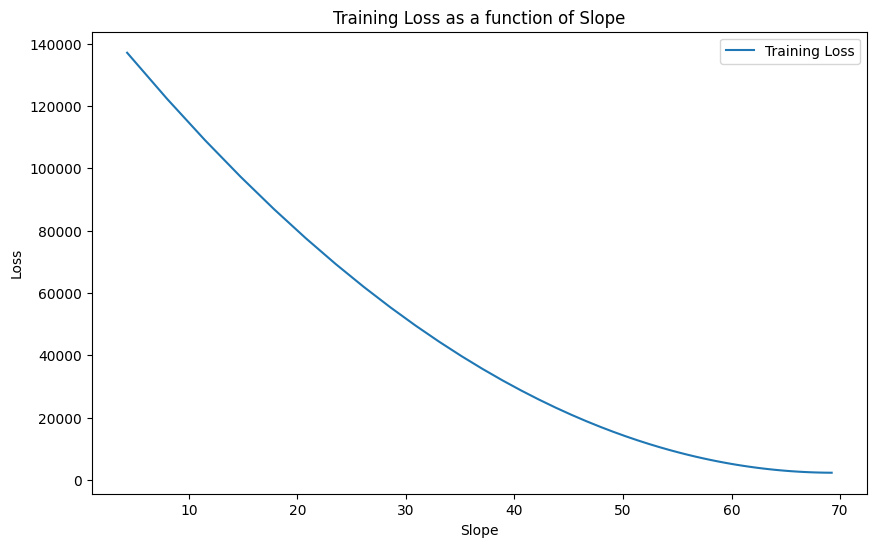

In [ ]:
# Define function to predict prices
def predict_price(slope, rooms):
    return slope * rooms


# learning rate and number of iterations
lr = 0.001 #Tweak this to see how the model learning converges.
#lr = .05 #For example, this setting will show the oscillatory behavior of learning.

iterations = 100 #this could be a useful value to tweak too

# initialize m (slope) with a random value. The seed is used to have the model start
#with the same random seed. Change the seed value to start off with a different random value
np.random.seed(1)
slope = np.random.rand()
print(f"Intital slope chosen at random:{slope}")

# training process
history_slope = []

history_error = []


#gradient step
h = .0001 #This value is used an approximation for the derivative
          #in Calculus (essentially the rate of change of a function at a point).
          #the smaller the value the closer it approximates the derivative at a point


for i in range(iterations):
    #predict prices using m
    #note rooms here contains all room counts of all the data points
    #in our training set. The predicted prices is also an array (or vector) that
    #hold the corresponding prices of those homes
    pred_prices = slope * rooms


    #  calculate the average error across all training points
    #this is a single number
    error = np.mean((pred_prices - prices)*(pred_prices - prices))


    history_error.append(error)


    #Now bump up the slope a little.
    #This is the forward step in the x direction discussed above.
    slope_step = slope + h

    #Now Compute predicted prices with this forward step in m
    pred_prices_step =  slope_step * rooms

    #Calculate the average error in prediction after the forward step in the x direction
    step_error = np.mean((pred_prices_step - prices)*(pred_prices_step - prices))

    #Now calculate gradient:-  f(x+h) - f(x)/h
    gradient = (step_error  - error)/h

    #Update slope. We subtract the gradient because we are walking downhill
    slope -= lr * gradient



    # save history
    history_slope.append(slope)



    # visualization
    if (i % 10 == 0):
      plt.figure(figsize=(10, 8))
      plt.scatter(rooms, prices)
      pred_prices_vals = predict_price(slope, rooms)
      plt.plot(rooms, pred_prices_vals,'o', color='red')
      plt.title(f'Iteration {i+1}, Slope: {slope:.2f}')
      plt.xlabel('Number of Rooms')
      plt.ylabel('Price')
      plt.show()

# Predict prices for the first and last iterations
first_slope = history_slope[0]
last_slope = history_slope[-1]

pred_prices_first_iter = predict_price(first_slope, rooms)
pred_prices_last_iter = predict_price(last_slope, rooms)

# Plot the data points and the lines of best fit
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# First iteration
ax[0].scatter(rooms, prices, color='blue', label='Data points')
ax[0].plot(rooms, pred_prices_first_iter,'o', color='red', label=f'Best fit line, slope: {first_slope:.2f}')
ax[0].set_title('First Iteration')
ax[0].set_xlabel('Number of Rooms')
ax[0].set_ylabel('Price')
ax[0].legend()

# Last iteration
ax[1].scatter(rooms, prices, color='blue', label='Data points')
ax[1].plot(rooms, pred_prices_last_iter,'o', color='red', label=f'Best fit line, slope: {last_slope:.2f}')
ax[1].set_title('Last Iteration')
ax[1].set_xlabel('Number of Rooms')
ax[1].set_ylabel('Price')
ax[1].legend()


plt.show()


# Plot the evolution of the slope over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_slope)
plt.title('Evolution of the slope over iterations')
plt.xlabel('Iteration')
plt.ylabel('Slope')
plt.grid(True)
plt.show()


#Plot the evolution of error over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_error)
plt.title('Evolution of the error over iterations (Loss function plot)')
plt.xlabel('Iteration')
plt.ylabel('Error/Loss')
plt.grid(True)
plt.show()


#Plot m vs error
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(history_slope, history_error, label='Training Loss')

plt.title('Training Loss as a function of Slope')
plt.xlabel('Slope')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Additional notes**

*   In practice, as mentioned in the beginning, we dont reduce the loss the way we did here. We calculate the derivative of the loss function with respect to **m**. The approach we did here is an approximation of the derivative
*   Note the evolution of the loss over iterations. It falls steeply at first and the plateaus. The steep fall is due to the gradient being steep when the loss is high. In practice optimizers tweak the learning rate as we go downhill, taking large steps first and then small steps as the loss starts to plateaue. This is to avoid overstepping past the lowest point by taking a large step.
* We will see how we could calculate the loss when there is more than one tweakable parameter in another notebook
* The basic idea introduced here  - tweaking the parameter of a model to reduce loss or error in the model predictions(compared to the ground truth values), is exactly the same approach used in training billion parameter models like ChatGPT
* Finding the the correct value of **m** for this line fitting problem, can be done by other means. It does not require a machine learning model. We use machine learning approach to solve this problem, to illustrate how neural networks with large number of parameters learn.




**Things to try**

- Change the value of learning rate to see how it impact learning. For instance setting it to .05 will show oscillatory behavior. This is because slope values can be high and take a significant proportion of them can cause the oscilatory behavior

- Change the value of the step h. Smaller the value, the closer we get to the derivate or range of change of a function at a point. Note this hyperparameter will not be present to tweak in a neural net model we use in practice where rate of change is done by a derivative.

- Iterations is useful hyperparameter (hyper here is used to differentiate from model parameter) to tweak too